In [1]:
# Author: Ashish Kumar

#imports
import pandas as pd
import keras
from keras.layers import Dense
from keras.models import Sequential
from matplotlib import pyplot as plt
import numpy as np
from random import randint
from PIL import Image
from __future__ import print_function
#from tensorflow import set_random_seed
#set_random_seed(2)
#np.random.seed(1337)

Using TensorFlow backend.


In [2]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# Preprocess the images to extract pixels 
# Do it only once 
import os.path
training_file = '/content/drive/My Drive/Colab Notebooks/train_with_pixel_colab.csv'
if (os.path.exists(training_file)==False):
    # create file
    print ("Creating file")
    train_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/train.csv')
    train_df['red'] = pd.Series(np.zeros(len(train_df['Id'])), index=train_df.index)
    train_df['green'] = pd.Series(np.zeros(len(train_df['Id'])), index=train_df.index)
    train_df['blue'] = pd.Series(np.zeros(len(train_df['Id'])), index=train_df.index)
    print (train_df.head(5))
    
    for i in range(len(train_df['Id'])):   
        sum_r=0
        sum_g=0
        sum_b=0
        im = Image.open('/content/drive/My Drive/Colab Notebooks/Archive/'+ str(train_df['Id'][i])+'.jpg') # Can be many different formats.
        pix = im.load()
        for x in range(0,im.size[0]):
            for y in range(0,im.size[1]):
                sum_r +=  pix[x,y][0]
                sum_g +=  pix[x,y][1]
                sum_b +=  pix[x,y][2]
        train_df['blue'][i] = sum_b/(im.size[1]*im.size[0])
        train_df['red'][i] = sum_r/(im.size[1]*im.size[0])
        train_df['green'][i] = sum_g/(im.size[1]*im.size[0])
    train_df['blue'] = train_df['blue']/255
    train_df['red'] = train_df['red']/255
    train_df['green'] = train_df['green']/255 
    plt.scatter(range(len(train_df['Id'])), train_df['blue'], c = 'b',s=5)
    plt.scatter(range(len(train_df['Id'])), train_df['green'], c = 'g',s=5)
    plt.scatter(range(len(train_df['Id'])), train_df['red'], c = 'r',s=5)
    plt.scatter(range(len(train_df['Id'])), train_df['DGCI'], c = 'k',s=5)
    plt.show()
    train_rm_outlier = train_df.drop(train_df.index[773:780])
    train_final=train_rm_outlier.reset_index()
    train_final.to_csv(training_file,index=False)


In [0]:
testing_file = '/content/drive/My Drive/Colab Notebooks/test_with_pixel_colab.csv'
if (os.path.exists(testing_file)==False):
    # create file
    print ("Creating file")
    test_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/sample.csv')
    test_df['red'] = pd.Series(np.zeros(len(test_df['Id'])), index=test_df.index)
    test_df['green'] = pd.Series(np.zeros(len(test_df['Id'])), index=test_df.index)
    test_df['blue'] = pd.Series(np.zeros(len(test_df['Id'])), index=test_df.index)
    print (test_df.head(5))
    
    for i in range(len(test_df['Id'])):   
        sum_r=0
        sum_g=0
        sum_b=0
        im = Image.open('/content/drive/My Drive/Colab Notebooks/Archive/'+ str(test_df['Id'][i])+'.jpg') # Can be many different formats.
        pix = im.load()
        for x in range(0,im.size[0]):
            for y in range(0,im.size[1]):
                sum_r +=  pix[x,y][0]
                sum_g +=  pix[x,y][1]
                sum_b +=  pix[x,y][2]
        test_df['blue'][i] = sum_b/(im.size[1]*im.size[0])
        test_df['red'][i] = sum_r/(im.size[1]*im.size[0])
        test_df['green'][i] = sum_g/(im.size[1]*im.size[0])
    test_df['blue'] = test_df['blue']/255
    test_df['red'] = test_df['red']/255
    test_df['green'] = test_df['green']/255 
    test_df.to_csv(testing_file,index=False)

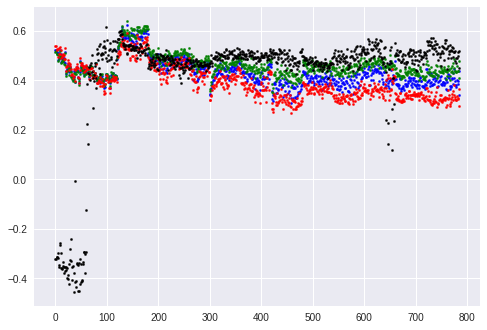

In [5]:
#read training file
train_df = pd.read_csv(training_file)
plt.scatter(range(len(train_df['Id'])), train_df['blue'], c = 'b',s=5)
plt.scatter(range(len(train_df['Id'])), train_df['green'], c = 'g',s=5)
plt.scatter(range(len(train_df['Id'])), train_df['red'], c = 'r',s=5)
plt.scatter(range(len(train_df['Id'])), train_df['DGCI'], c = 'k',s=5)
plt.show()

In [0]:
best_score = 0.1
train_df = train_df.drop('Id',axis = 1)
train_df = train_df.drop('index',axis = 1)

In [0]:
train_df['diff-bg'] = train_df['blue'] - train_df['green']
train_df['diff-gr'] = train_df['green'] - train_df['red']
train_df['diff-rb'] = train_df['red'] - train_df['blue']


In [0]:
x_train = train_df.drop('DGCI',axis=1)
y_train = train_df['DGCI']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_train,y_train,test_size=0.3)


In [0]:
test_df = pd.read_csv(testing_file).drop(['Id','DGCI'],axis=1)
test_df['diff-bg'] = test_df['blue'] - test_df['green']
test_df['diff-gr'] = test_df['green'] - test_df['red']
test_df['diff-rb'] = test_df['red'] - test_df['blue']


In [0]:
def layer (batch_size=5, epochs = 100, nodes1 = 6,nodes2=20, nodes3=20):
  #batch_size = 5
  #epochs = 1000

  #print('Training data shape:', x_train.shape)
  print(x_train.shape[0], 'train samples')
  print(x_test.shape[0], 'test samples')

  model = Sequential()
  model.add(Dense(nodes1, input_dim=6, kernel_initializer='normal', activation='relu'))
  model.add(Dense(nodes2, kernel_initializer='normal', activation='relu'))
  model.add(Dense(nodes3, kernel_initializer='normal', activation='relu'))
  model.add(Dense(1, kernel_initializer='normal'))

  model.compile(loss='mean_squared_error', optimizer='adam')

  history = model.fit(x_train, y_train,
            batch_size=batch_size,
            epochs=epochs,
            verbose=0,
            #validation_split=0.25,
            validation_data=(x_test, y_test),
            shuffle=True)

  score = model.evaluate(x_test, y_test, verbose=0)
  # Plot training & validation accuracy values
  #plt.plot(history.history['acc'])
  #plt.plot(history.history['val_acc'])
  #plt.title('Model accuracy')
  #plt.ylabel('Accuracy')
  #plt.xlabel('Epoch')
  #plt.legend(['Train', 'Test'], loc='upper left')
  #plt.show()

  # Plot training & validation loss values
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper right')
  plt.show()
  print('Test score:', score)
  print('Test Score = ', score, 'n1 n2 n3 = ', n1, n2 , n3)
  return score,model


nodes config : 704 411 561
549 train samples
236 test samples


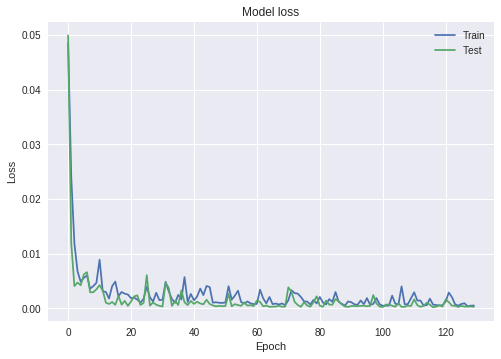

Test score: 0.0002691704472546639
Test Score =  0.0002691704472546639 n1 n2 n3 =  704 411 561


In [13]:
import random
#nodeslist = [( random.randint(1, 1000), random.randint(1, 1000), random.randint(1,1000)) for k in range(30)]
nodeslist=[(704,411,561)]
for (n1,n2,n3) in nodeslist:
  print ("nodes config :", n1,n2,n3 )
  s,m = layer(batch_size=9,nodes1=n1,nodes2=n2,nodes3=n3,epochs=130)

  if (best_score > s ):
    best_score = s
    best_model = m
    best_n1, best_n2, best_n3 = n1,n2,n3
    pred=best_model.predict(test_df, batch_size=None, verbose=0, steps=None)
    
    pred_df = pd.DataFrame(data=pred)

    pred_df.to_csv('/content/drive/My Drive/Colab Notebooks/kaggle_7v10.csv',index_label=False)

#Test Score =  0.006211620407470525 n1 n2 n3 =  274 778 774
#0.0025696679160504016 best n1 n2 n3 =  731 315 11 (2nd best till now) .3
#0.0003574650150375983 best n1 n2 n3 =  1802 866 478 test:0.1'
#Test Score =  0.002180392393444896 n1 n2 n3 =  4852 117 401 0.4
#Test Score =  0.0016007850440501264 n1 n2 n3 =  199 430 100 .21 batch 100
##Test Score =  0.0012138651573430684 n1 n2 n3 =  163 559 391 .3 e=300 b = 61
#Test Score =  0.0013983640240177795 n1 n2 n3 =  912 258 682 130=epoch b = 9 test=0.3 v8
# 0.00032842510441018235 best n1 n2 n3 =  704 411 561 batch_size=9 epochs=130 v9 .3 best till now)
#0.0006825088395567421 best n1 n2 n3 =  31 49 34 epoch 1000

In [14]:
print (best_score)
print ("best n1 n2 n3 = ",best_n1, best_n2,best_n3)

0.0002691704472546639
best n1 n2 n3 =  704 411 561


In [0]:
best_model.save('/content/drive/My Drive/Colab Notebooks/dgci_model_v10.h5')